# Explorarory Data Analysis (**CO2 from the Energy Sector**)

> **Tracking the changes in CO2 emissions from different energy sectors**

## Part-1: EDA on Whole Data

### Step-1: Importing Libraries

In [101]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step-2: Importing Dataset

> DataSet Source: https://www.fao.org/faostat/en/#data/GN

In [102]:
# importing Dataset
df = pd.read_csv('energy_use_data_11-29-2021.csv')
df.head().T

,0,1,2,3,4
Domain Code,GN,GN,GN,GN,GN
Domain,Energy Use,Energy Use,Energy Use,Energy Use,Energy Use
Area Code (ISO3),AFG,AFG,AFG,AFG,AFG
Area,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
Element Code,7273,7273,7273,7273,7273
Element,Emissions (CO2),Emissions (CO2),Emissions (CO2),Emissions (CO2),Emissions (CO2)
Item Code,6801,6801,6801,6801,6801
Item,Gas-Diesel oil,Gas-Diesel oil,Gas-Diesel oil,Gas-Diesel oil,Gas-Diesel oil
Year Code,1990,1991,1992,1993,1994
Year,1990,1991,1992,1993,1994


### Step-3: Data Shape

In [103]:
# Shape of Dataset
row, col=df.shape
print('Total number of observations/rows/entries:', row)
print('Total number of columns:', col)

Total number of observations/rows/entries: 46131
Total number of columns: 14


### Step-4: Data Structure

> Extracting Basic Data Information like Data Range, No of Columns, Non-Null Values, Dtypes and memory usage

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46131 entries, 0 to 46130
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       46131 non-null  object 
 1   Domain            46131 non-null  object 
 2   Area Code (ISO3)  46131 non-null  object 
 3   Area              46131 non-null  object 
 4   Element Code      46131 non-null  int64  
 5   Element           46131 non-null  object 
 6   Item Code         46131 non-null  int64  
 7   Item              46131 non-null  object 
 8   Year Code         46131 non-null  int64  
 9   Year              46131 non-null  int64  
 10  Unit              46131 non-null  object 
 11  Value             46131 non-null  float64
 12  Flag              46131 non-null  object 
 13  Flag Description  46131 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 4.9+ MB


### Step-5: Finding Missing Values

In [105]:
# Finding the missing values
df.isnull().sum()

Domain Code         0
Domain              0
Area Code (ISO3)    0
Area                0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

- DataSet is cleaned as far as missing values are concerned

### Step-6: Summary Statistics

> Getting summary statistics of continuos variables

In [106]:
df.describe()

,Element Code,Item Code,Year Code,Year,Value
count,46131.0,46131.000000,46131.000000,46131.000000,46131.000000
mean,7273.0,6803.571720,1998.988814,1998.988814,863.132722
std,0.0,2.916637,13.111035,13.111035,5274.730687
min,7273.0,6800.000000,1970.000000,1970.000000,0.000000
25%,7273.0,6801.000000,1990.000000,1990.000000,3.370750
50%,7273.0,6804.000000,2000.000000,2000.000000,21.489900
75%,7273.0,6805.000000,2010.000000,2010.000000,165.728900
max,7273.0,6809.000000,2019.000000,2019.000000,197674.559300


- Value column is important for further analysis, rest have no logical sense

### Step-7: Value Counts

> to check the number of unique values in each column

In [107]:
df.Item.value_counts() 

Motor Gasoline                       8756
Gas-Diesel oil                       8160
Liquefied petroleum gas (LPG)        7431
Fuel oil                             6418
Electricity                          6061
Coal                                 4304
Natural gas (including LNG)          3787
Gas-diesel oils used in fisheries     747
Fuel oil used in fisheries            467
Name: Item, dtype: int64

>  unique values in each columns


In [108]:
df.nunique() 

Domain Code             1
Domain                  1
Area Code (ISO3)      229
Area                  229
Element Code            1
Element                 1
Item Code               9
Item                    9
Year Code              50
Year                   50
Unit                    1
Value               34024
Flag                    3
Flag Description        3
dtype: int64

### Step-8: Feature Selection

- "Domain Code", "Domain", "Element Code" and "Element" contain only one variable. Similarly "YearCode", "Area Code" and "Flag" columns does not provide any useful insights. Therefore these can be removed from the dataset with no loss of understanding/ distorting the overall dataset.

> Clean data - exclude unnecessary data improved readability


In [109]:

df_clean = pd.read_csv("energy_use_data_11-29-2021.csv")
x = ["Area Code (ISO3)", "Domain Code", "Domain", "Element Code", "Element", "Year Code","Flag" ]
df_clean.drop( x, inplace = True, axis =1)
df_clean.head()

,Area,Item Code,Item,Year,Unit,Value,Flag Description
0,Afghanistan,6801,Gas-Diesel oil,1990,kilotonnes,231.4918,FAO estimate
1,Afghanistan,6801,Gas-Diesel oil,1991,kilotonnes,188.5317,FAO estimate
2,Afghanistan,6801,Gas-Diesel oil,1992,kilotonnes,47.9904,FAO estimate
3,Afghanistan,6801,Gas-Diesel oil,1993,kilotonnes,38.6116,FAO estimate
4,Afghanistan,6801,Gas-Diesel oil,1994,kilotonnes,31.4465,FAO estimate


### Step-9: Distribution of Data

-  The data is extremely broadly distributed with many values in the range of 0 to 25000 with a strong skew to the right.

> Overall Data Distribution


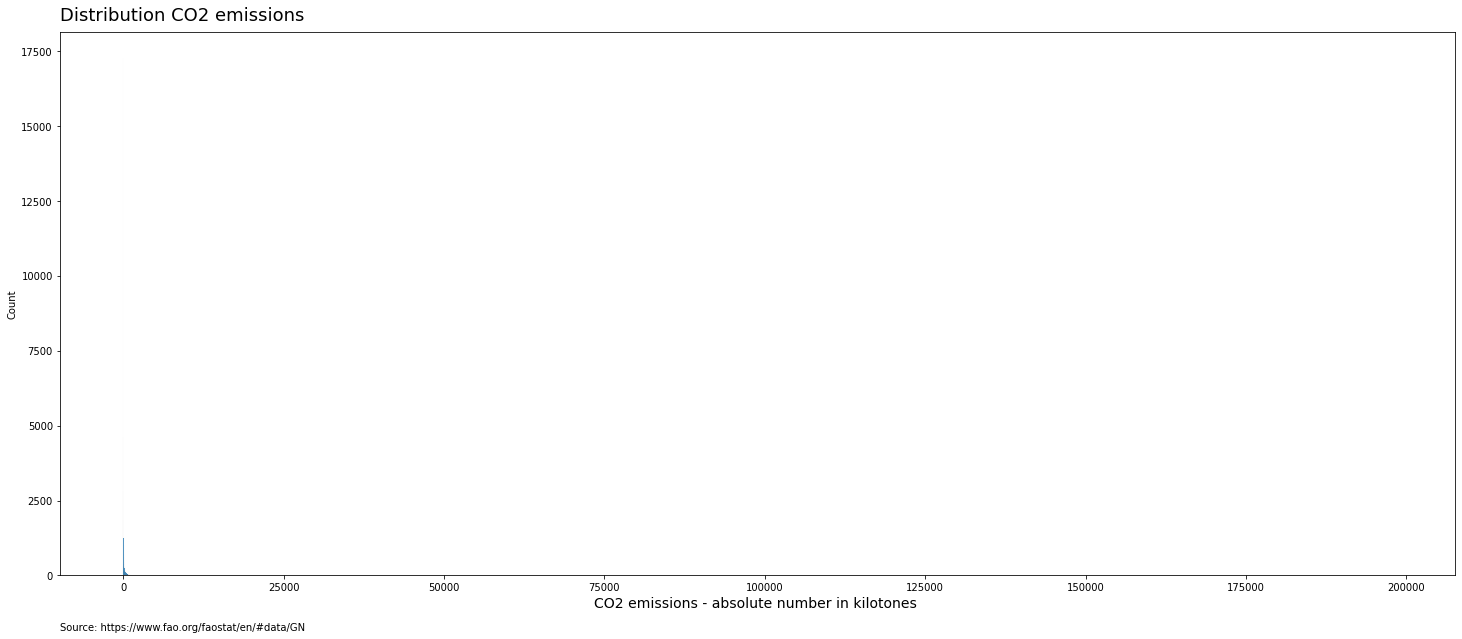

In [110]:
plt.figure(figsize = (25,10))
sns.histplot(x = "Value", data = df_clean)

#customisation
plt.xlabel("CO2 emissions - absolute number in kilotones ", fontsize=14)
plt.title("Distribution CO2 emissions", fontsize = 18, loc='left', y=1.01  )
plt.annotate('Source: https://www.fao.org/faostat/en/#data/GN', (0,-.1), xycoords ='axes fraction')

plt.show()

- This distribution remains relatively unchanged when each energy industry is examined individually.

> Data Distribution by Energy Sector


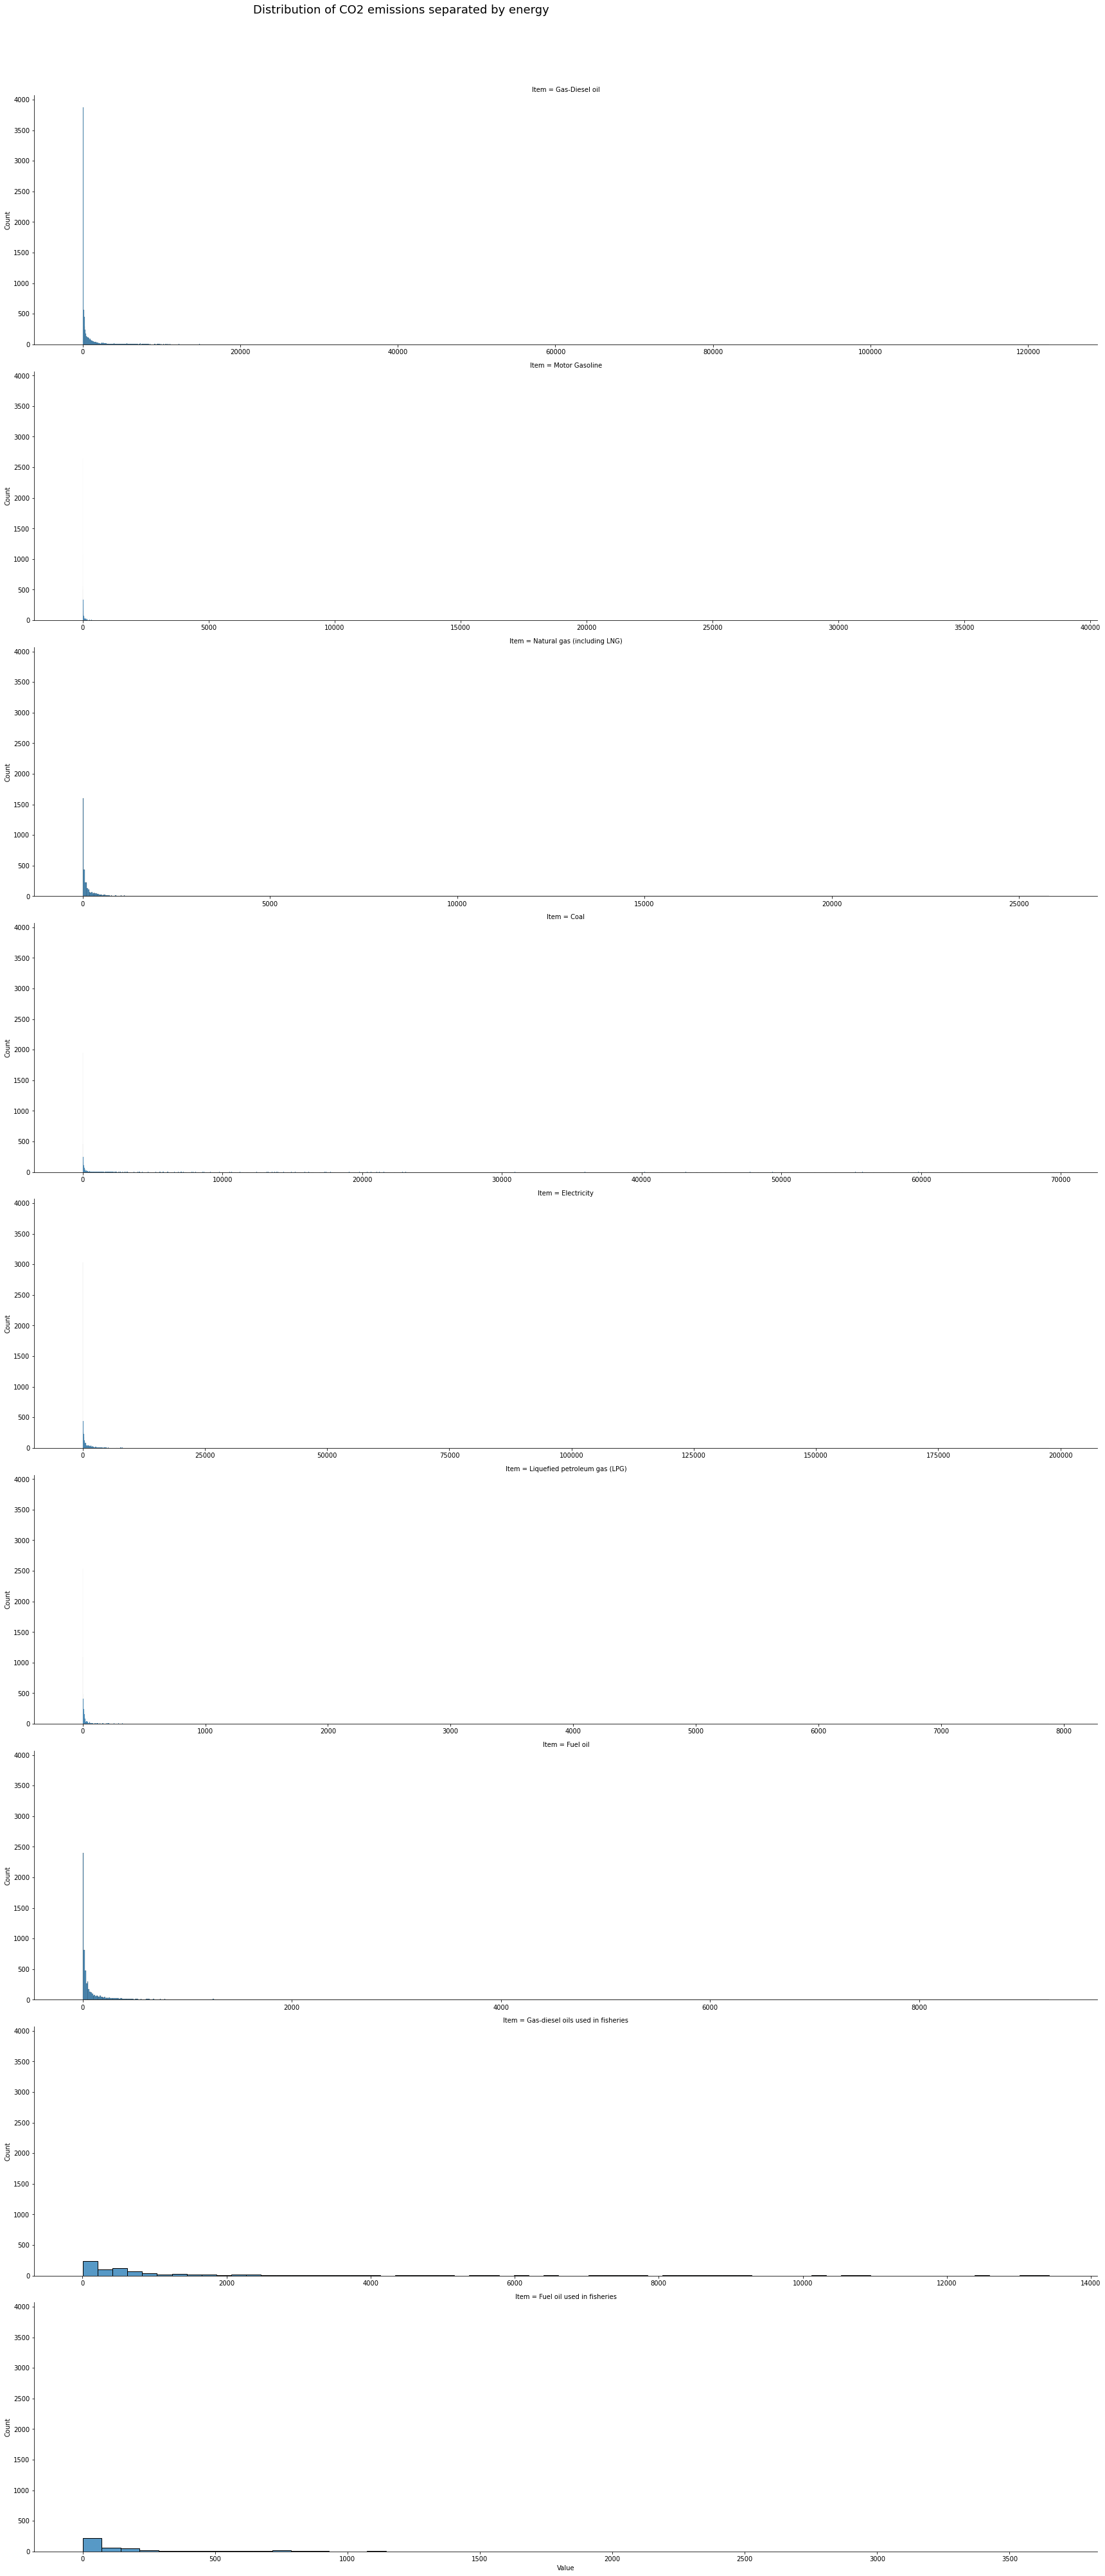

In [111]:
g= sns.FacetGrid(data = df_clean, col = "Item", col_wrap = 1,margin_titles= False, height = 6,aspect = 4,  sharex=False)
g.map(sns.histplot, "Value",)

#customisation
g.fig.suptitle('Distribution of CO2 emissions separated by energy ',fontsize = 18, horizontalalignment='right', y = 1.03)
plt.show()

- In other words, the data contains a high number of mathematical outliers as further emphasised by the following boxplots.

> Boxplot of CO2 emissions

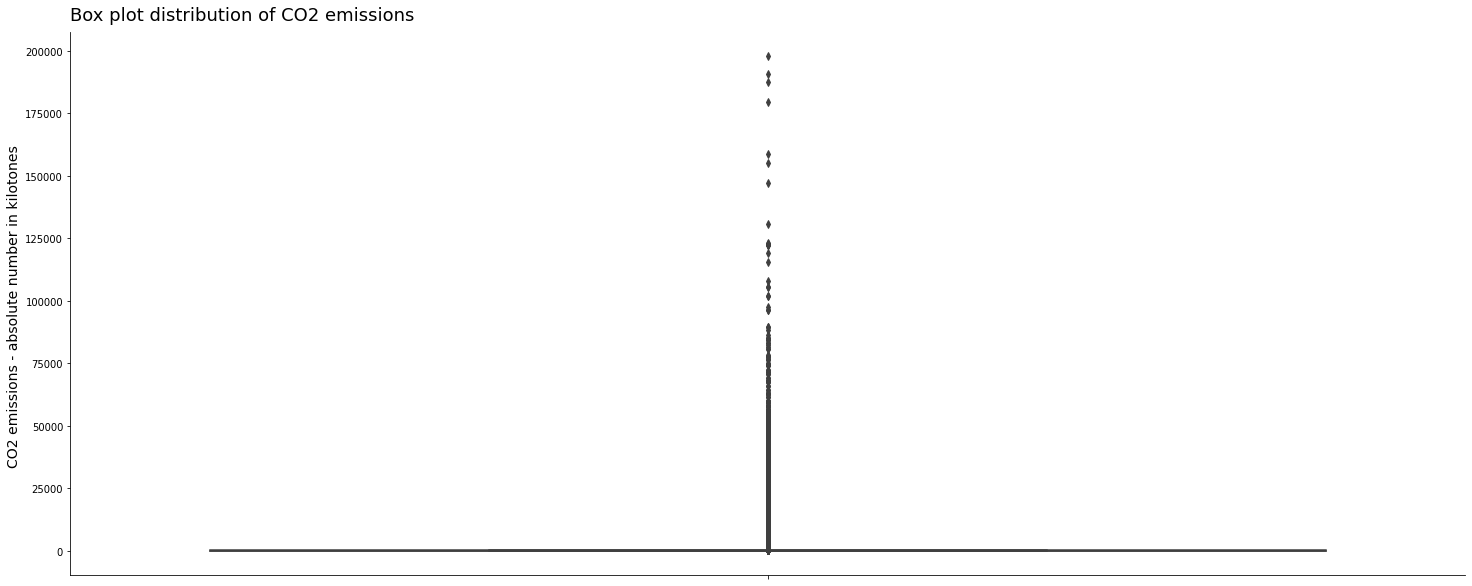

In [112]:
plt.figure(figsize = (25,10))
sns.boxplot(y = "Value", data = df_clean)

#customisation
sns.despine(top = True, right = True, left = False, bottom = False)
plt.ylabel("CO2 emissions - absolute number in kilotones ", fontsize=14)
plt.title("Box plot distribution of CO2 emissions", fontsize = 18, loc='left', y=1.01  )

plt.show()

>  Boxplot of CO2 emissions by Energy Sector 


Text(0.5, 0, 'Energy')

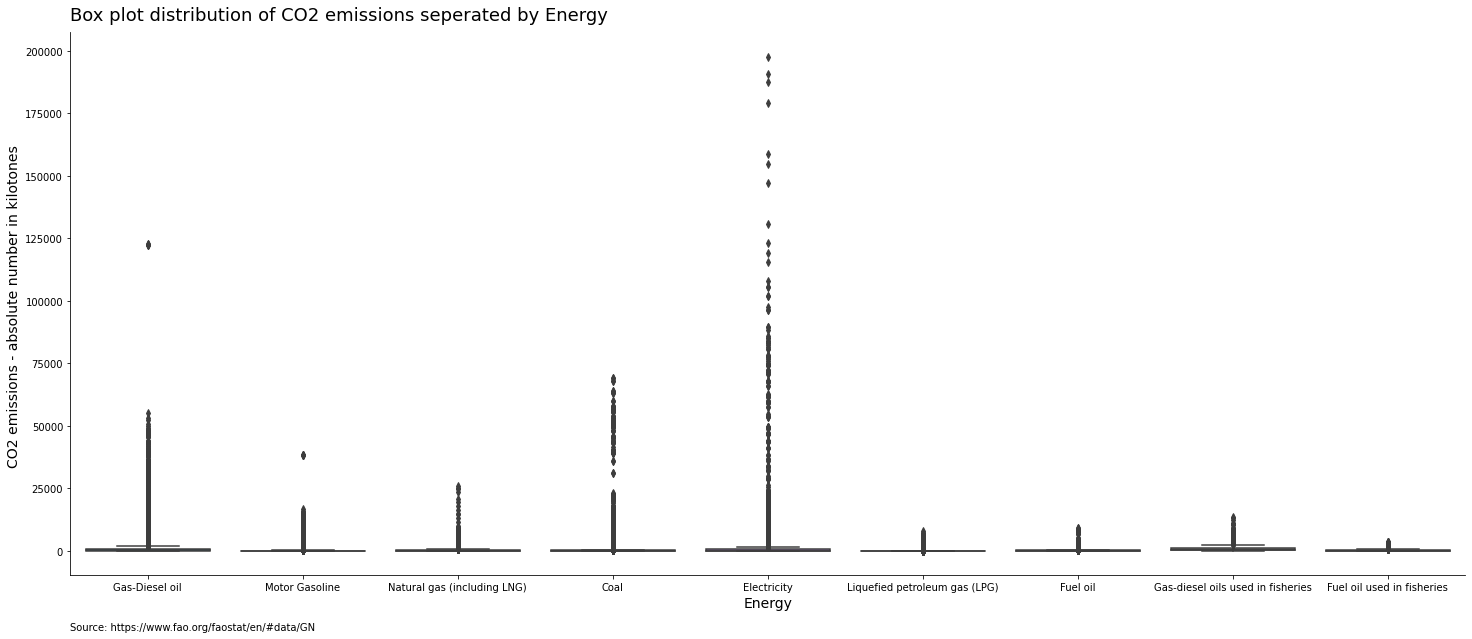

In [113]:
plt.figure(figsize = (25,10))
sns.boxplot(data= df_clean, x= "Item", y = "Value")

#customisation
plt.annotate('Source: https://www.fao.org/faostat/en/#data/GN', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Box plot distribution of CO2 emissions seperated by Energy", fontsize = 18, loc='left', y=1.01  )


plt.ylabel("CO2 emissions - absolute number in kilotones ", fontsize=14)
plt.xlabel("Energy", fontsize=14)

### Step-9: Visualization of Data

> visualization of CO2 emissions over the years


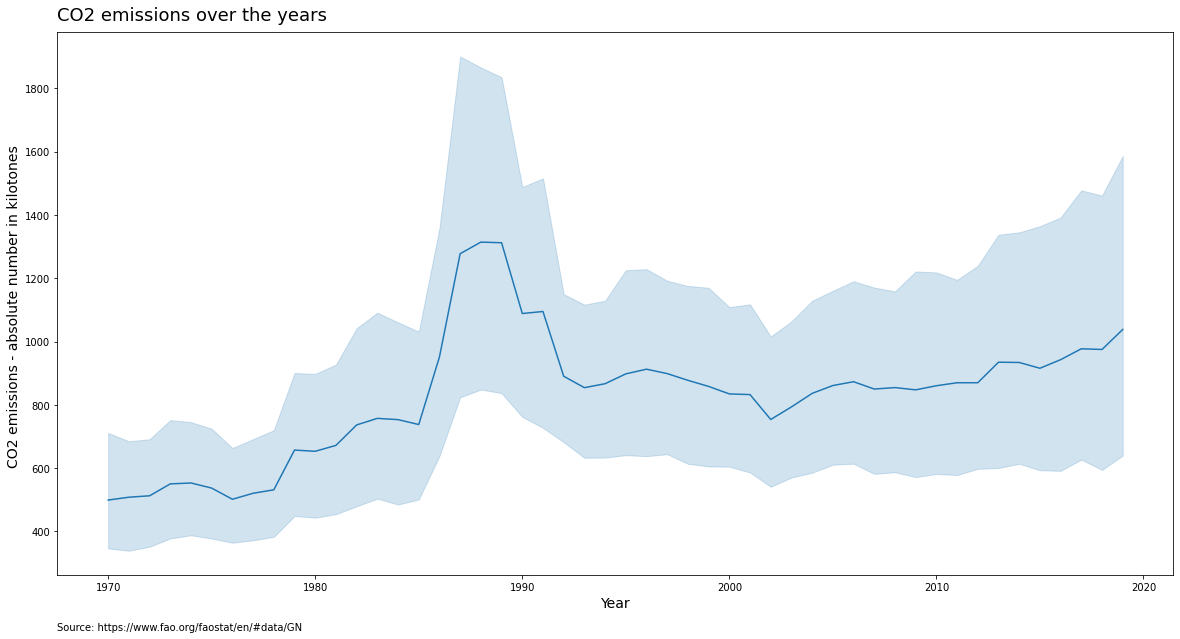

In [114]:
plt.figure(figsize = (20,10))
sns.lineplot(x = "Year", y = "Value", data = df_clean)

#customisation
plt.annotate('Source: https://www.fao.org/faostat/en/#data/GN', (0,-.1), xycoords ='axes fraction' )
plt.title("CO2 emissions over the years", fontsize = 18, loc='left', y=1.01 )
plt.xlabel("Year", fontsize=14)
plt.ylabel("CO2 emissions - absolute number in kilotones ", fontsize=14)

plt.show()

> visualization of CO2 emissions over the years

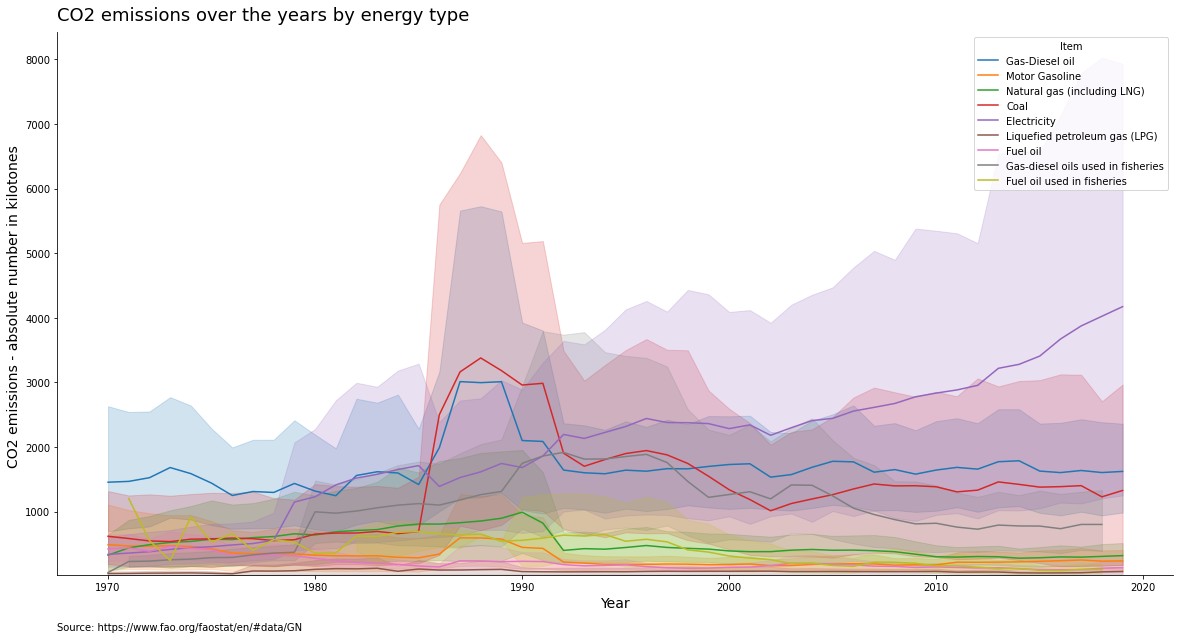

In [115]:
plt.figure(figsize = (20,10))
sns.lineplot(x = "Year", y = "Value", data = df_clean, hue = "Item")

#customisation
plt.annotate('Source: https://www.fao.org/faostat/en/#data/GN', (0,-.1), xycoords ='axes fraction' )
plt.ylim(10,)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("CO2 emissions over the years by energy type", fontsize = 18, loc='left', y=1.01 )
plt.xlabel("Year", fontsize=14)
plt.ylabel("CO2 emissions - absolute number in kilotones ", fontsize=14)

plt.show()

> Distribution of Energy type 

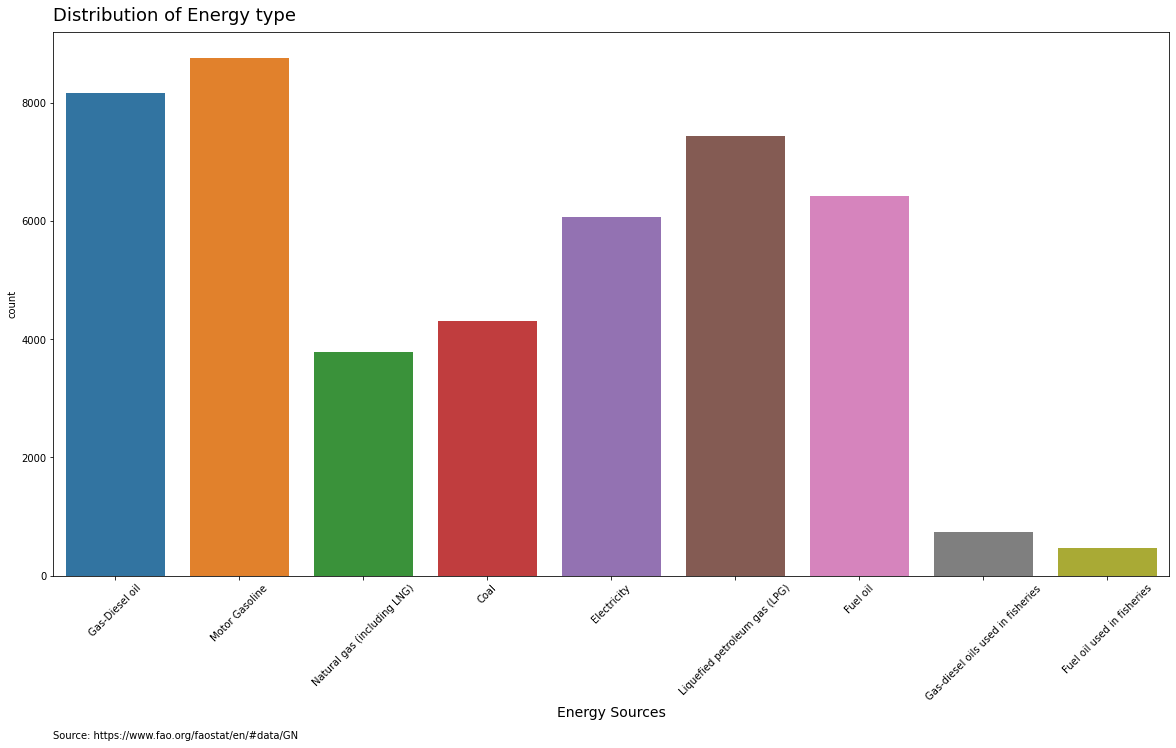

In [116]:
plt.figure(figsize = (20,10))
sns.countplot(x = "Item", data = df_clean)

#customisation
plt.xlabel("Energy Sources", fontsize=14)
plt.annotate('Source: https://www.fao.org/faostat/en/#data/GN', (0,-.3), xycoords ='axes fraction')
plt.title("Distribution of Energy type", fontsize = 18, loc='left', y=1.01  )
plt.xticks(rotation=45)
plt.show()

> Top 10 Countries with maximum CO2 Emissions

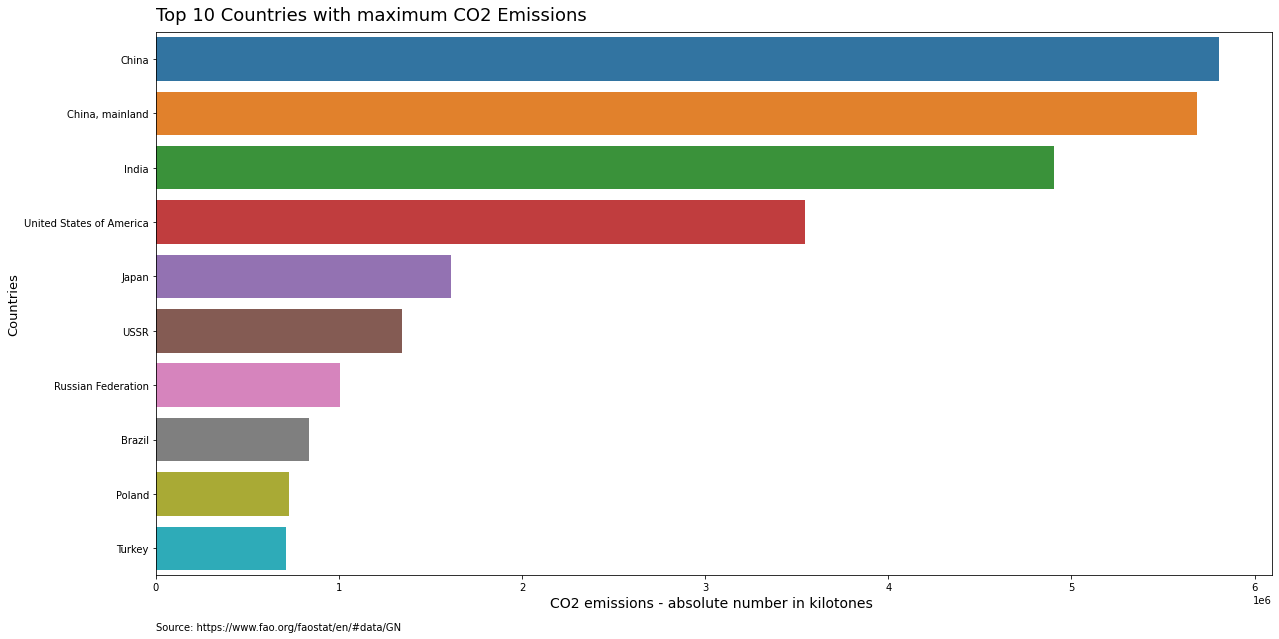

In [117]:
s = df_clean.groupby(["Area"]).sum().sort_values(by="Value", ascending=False).head(10)

plt.figure(figsize = (20,10))
sns.barplot(y=s.index,x='Value',data=s)

#customisation
plt.annotate('Source: https://www.fao.org/faostat/en/#data/GN', (0,-.1), xycoords ='axes fraction' )
plt.title("Top 10 Countries with maximum CO2 Emissions", fontsize = 18, loc='left', y=1.01 )
plt.ylabel("Countries", fontsize=13)
plt.xlabel("CO2 emissions - absolute number in kilotones ", fontsize=14)

plt.show()

In [118]:
df_clean1 = df_clean.drop(["Year",'Item Code'], axis=1)
s1 = df_clean1.groupby(["Area"]).sum().sort_values(by="Value", ascending=False).head(10)
s1.head(10)

,Value
Area,
China,5.804601e+06
"China, mainland",5.686551e+06
India,4.906070e+06
United States of America,3.544757e+06
Japan,1.613227e+06
USSR,1.342590e+06
Russian Federation,1.006218e+06
Brazil,8.381262e+05
Poland,7.275216e+05


Item
Coal                             8.465990e+05
Electricity                      3.542233e+06
Fuel oil                         7.315993e+04
Gas-Diesel oil                   6.778946e+05
Liquefied petroleum gas (LPG)    3.354174e+03
Motor Gasoline                   1.541632e+03
Natural gas (including LNG)      4.146732e+04
Name: Value, dtype: float64

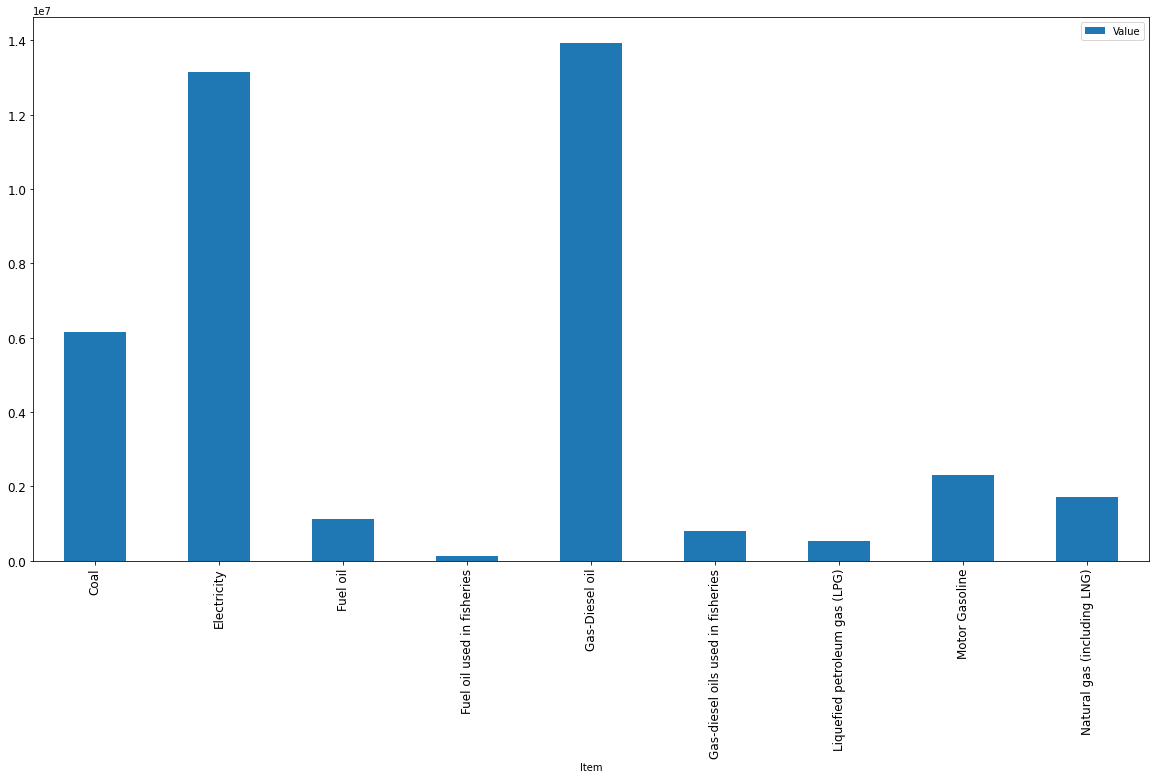

In [119]:

value_count = df.groupby("Item")["Value"].sum().plot(kind="bar", figsize=(20,10), legend=True, fontsize=12)
value_count
value_count1 = df_sub.groupby("Item")["Value"].sum()
value_count1


## Part-2: EDA on Subcontinent
CO2 Emissions from Subcontinent
In this section subcontinent countries will be examined. the list of countries are as follows:

* Bangladesh,
* India,
* Pakistan

### Feature Selection and Data Insights

> Selecting Subcontinents countries


In [120]:
df_sub = df_clean[df_clean["Area"].isin(["India", "Pakistan", 'Bangladesh'])]
df_sub.head()

,Area,Item Code,Item,Year,Unit,Value,Flag Description
2915,Bangladesh,6801,Gas-Diesel oil,1972,kilotonnes,31.8630,International reliable sources
2916,Bangladesh,6801,Gas-Diesel oil,1973,kilotonnes,38.2356,International reliable sources
2917,Bangladesh,6801,Gas-Diesel oil,1974,kilotonnes,149.7561,International reliable sources
2918,Bangladesh,6801,Gas-Diesel oil,1975,kilotonnes,168.8739,International reliable sources
2919,Bangladesh,6801,Gas-Diesel oil,1976,kilotonnes,178.4328,International reliable sources


> Shape of selected subcontinents countries dataframe


In [121]:
df_sub.shape

(1019, 7)

> Summary Statistics of selected subcontinents countries dataframe


In [122]:
df_sub.describe()

,Item Code,Year,Value
count,1019.000000,1019.000000,1019.000000
mean,6803.989205,1995.056919,5089.548264
std,3.036271,14.077065,19611.971126
min,6800.000000,1970.000000,0.052800
25%,6801.000000,1983.000000,7.789800
50%,6804.000000,1995.000000,185.034800
75%,6807.000000,2007.000000,817.537500
max,6809.000000,2019.000000,197674.559300


> Value of CO2 emission

In [123]:
df_clean2 = df_sub.drop(["Year",'Item Code'], axis=1)
sub1 = df_clean2.groupby(["Area"]).sum().sort_values(by="Value", ascending=False).head()
sub1.head()

,Value
Area,
India,4.906070e+06
Pakistan,1.924383e+05
Bangladesh,8.774187e+04


### Visualizing Subcontinents Countries Role in CO2 emissions

#### Subcontinent Countries (Combine) CO2 Emissions usage over the years

> Energy usage by subcontinents countries


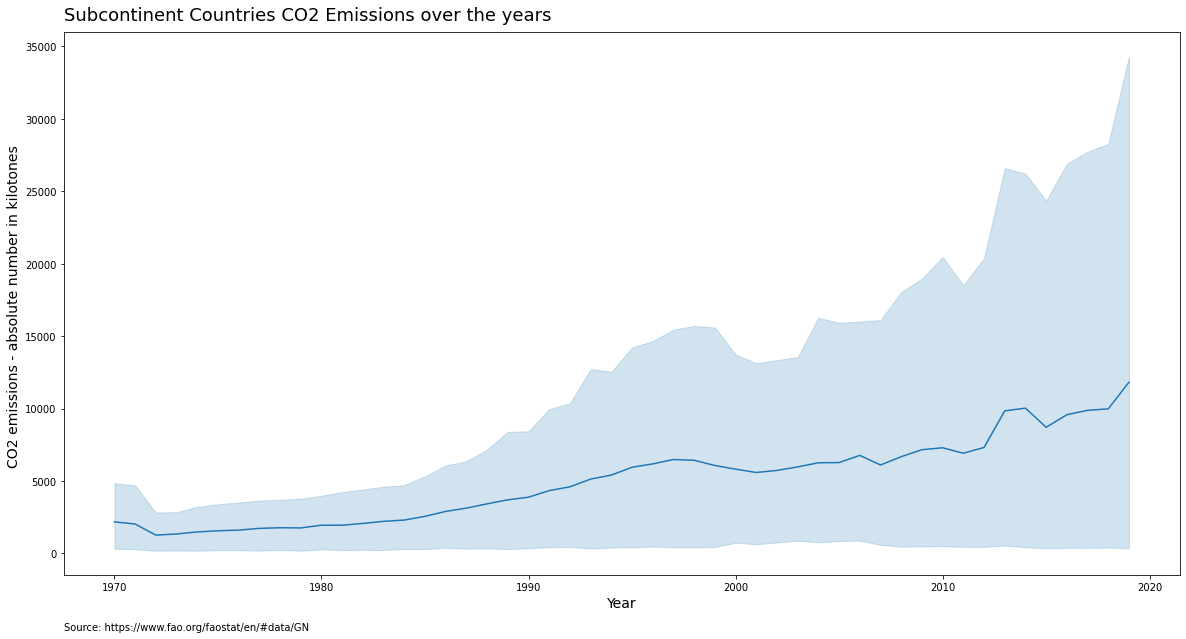

In [124]:
plt.figure(figsize = (20,10))
sns.lineplot(x = "Year", y = "Value", data = df_sub)

#customisation
plt.annotate('Source: https://www.fao.org/faostat/en/#data/GN', (0,-.1), xycoords ='axes fraction' )
plt.title("Subcontinent Countries CO2 Emissions over the years", fontsize = 18, loc='left', y=1.01 )
plt.xlabel("Year", fontsize=14)
plt.ylabel("CO2 emissions - absolute number in kilotones ", fontsize=14)
plt.show()

#### Subcontinent Countries (Combine) CO2 Emissions over the years by Energy Type

> Energy usage by subcontinents countries


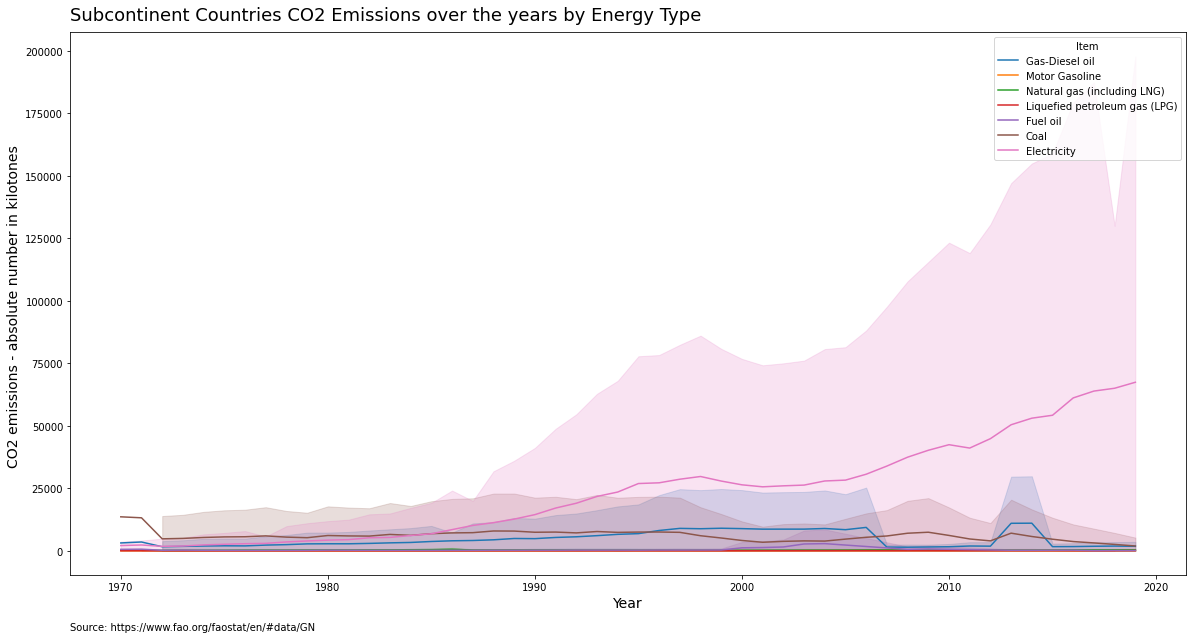

In [125]:
plt.figure(figsize = (20,10))
sns.lineplot(x = "Year", y = "Value", data = df_sub, hue = "Item")

#customisation
plt.annotate('Source: https://www.fao.org/faostat/en/#data/GN', (0,-.1), xycoords ='axes fraction' )
plt.title("Subcontinent Countries CO2 Emissions over the years by Energy Type", fontsize = 18, loc='left', y=1.01 )
plt.xlabel("Year", fontsize=14)
plt.ylabel("CO2 emissions - absolute number in kilotones ", fontsize=14)
plt.show()

#### Study Each Subcontinent Country and Their Comparison 

#### Bangladesh

> Contruct visualisation for Bangladesh CO2 Emissions over the years


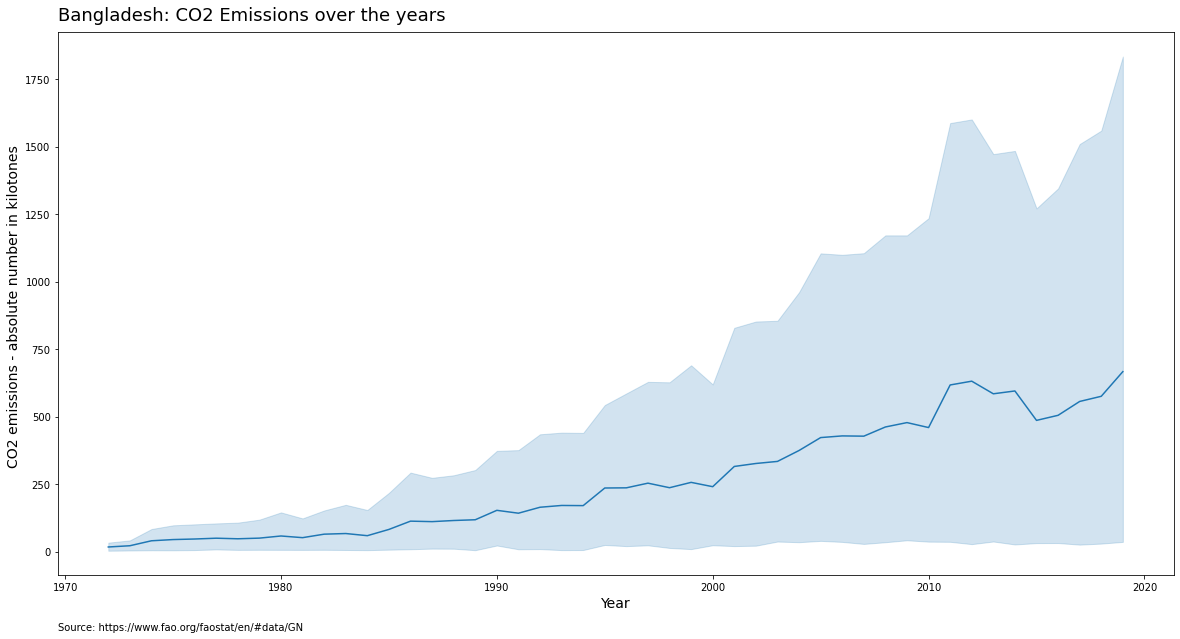

In [126]:
plt.figure(figsize = (20,10))
sns.lineplot(x = "Year", y = "Value", data = df_sub[df_sub["Area"]=="Bangladesh"])

#customisation
plt.annotate('Source: https://www.fao.org/faostat/en/#data/GN', (0,-.1), xycoords ='axes fraction' )
plt.title("Bangladesh: CO2 Emissions over the years", fontsize = 18, loc='left', y=1.01 )
plt.xlabel("Year", fontsize=14)
plt.ylabel("CO2 emissions - absolute number in kilotones ", fontsize=14)

plt.show()

> Groupby Bangladesh and Item and plot the mean in horizontal bar chart


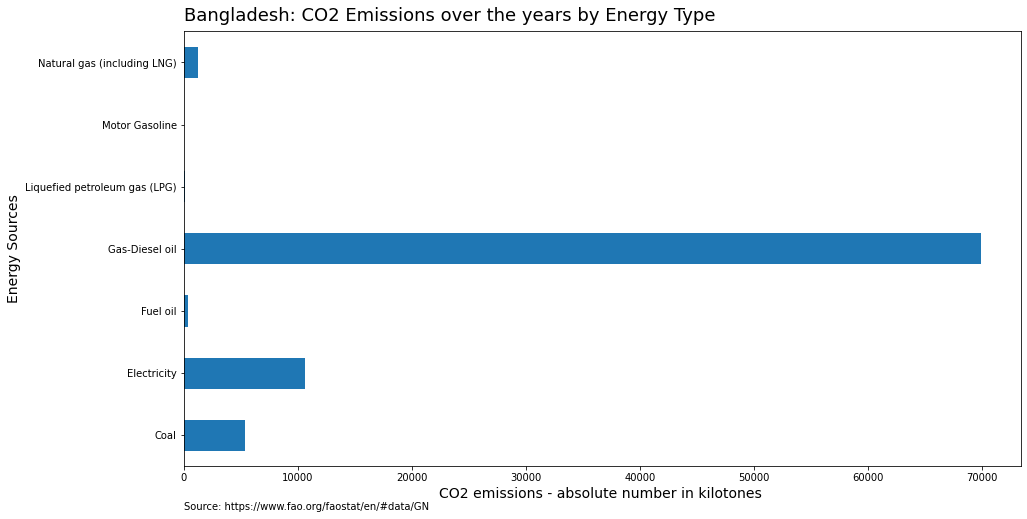

In [127]:
df_sub[df_sub["Area"]=="Bangladesh"].groupby("Item")["Value"].sum().plot(kind="barh", figsize=(15,8))

#customisation
plt.annotate('Source: https://www.fao.org/faostat/en/#data/GN', (0,-.1), xycoords ='axes fraction' )
plt.title("Bangladesh: CO2 Emissions over the years by Energy Type", fontsize = 18, loc='left', y=1.01 )
plt.ylabel("Energy Sources", fontsize=14)
plt.xlabel("CO2 emissions - absolute number in kilotones ", fontsize=14)
plt.show()

In [146]:
df_sub[df_sub["Area"]=="Bangladesh"].groupby("Item")["Value"].sum()

Item
Coal                              5370.3701
Electricity                      10654.8759
Fuel oil                           378.0197
Gas-Diesel oil                   69889.1326
Liquefied petroleum gas (LPG)      123.7708
Motor Gasoline                      35.0041
Natural gas (including LNG)       1290.6937
Name: Value, dtype: float64

#### India

> Contruct visualisation for India CO2 Emissions over the years


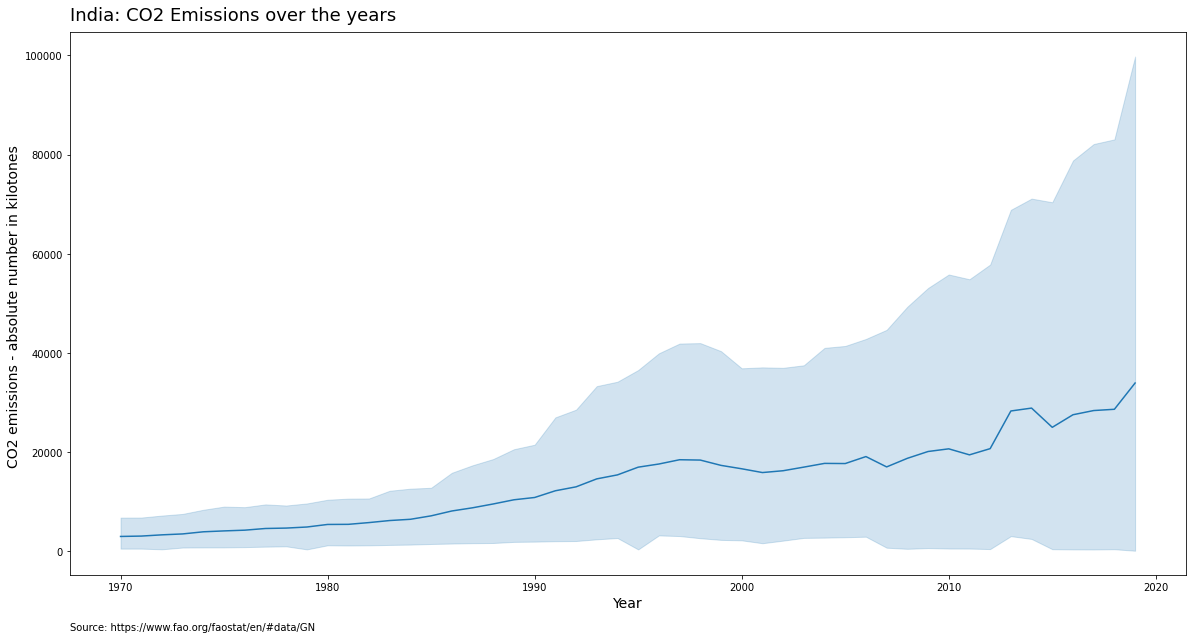

In [128]:
plt.figure(figsize = (20,10))
sns.lineplot(x = "Year", y = "Value", data = df_sub[df_sub["Area"]=="India"])

#customisation
plt.annotate('Source: https://www.fao.org/faostat/en/#data/GN', (0,-.1), xycoords ='axes fraction' )
plt.title("India: CO2 Emissions over the years", fontsize = 18, loc='left', y=1.01 )
plt.xlabel("Year", fontsize=14)
plt.ylabel("CO2 emissions - absolute number in kilotones ", fontsize=14)

plt.show()

> Groupby India and Item and plot the mean in horizontal bar chart


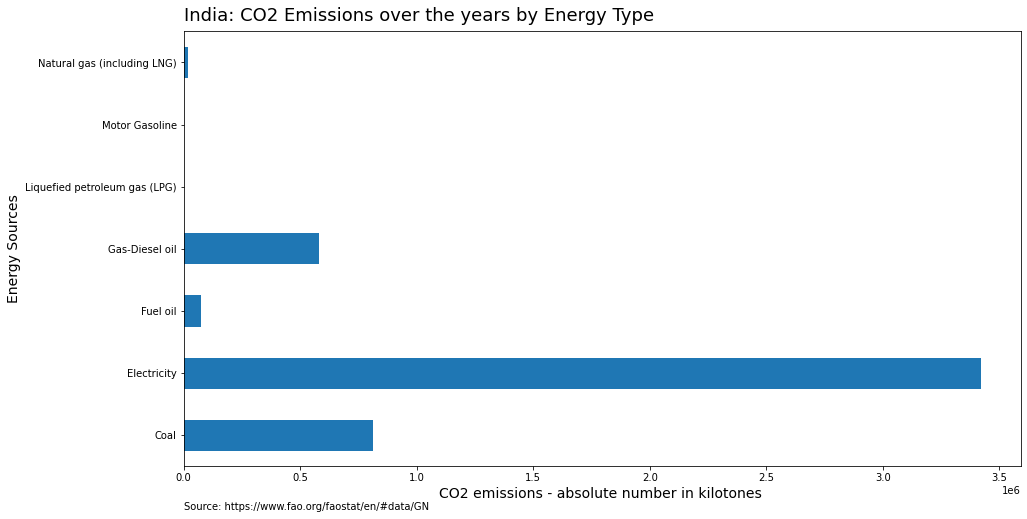

In [129]:
df_sub[df_sub["Area"]=="India"].groupby("Item")["Value"].sum().plot(kind="barh", figsize=(15,8))

#customisation
plt.annotate('Source: https://www.fao.org/faostat/en/#data/GN', (0,-.1), xycoords ='axes fraction' )
plt.title("India: CO2 Emissions over the years by Energy Type", fontsize = 18, loc='left', y=1.01 )
plt.ylabel("Energy Sources", fontsize=14)
plt.xlabel("CO2 emissions - absolute number in kilotones ", fontsize=14)
plt.show()

In [145]:
df_sub[df_sub["Area"]=="India"].groupby("Item")["Value"].sum()

Item
Coal                             8.133342e+05
Electricity                      3.420779e+06
Fuel oil                         7.242071e+04
Gas-Diesel oil                   5.801133e+05
Liquefied petroleum gas (LPG)    3.277531e+02
Motor Gasoline                   1.217229e+03
Natural gas (including LNG)      1.787776e+04
Name: Value, dtype: float64

#### Pakistan

> Contruct visualisation for Pakistan CO2 Emissions over the years


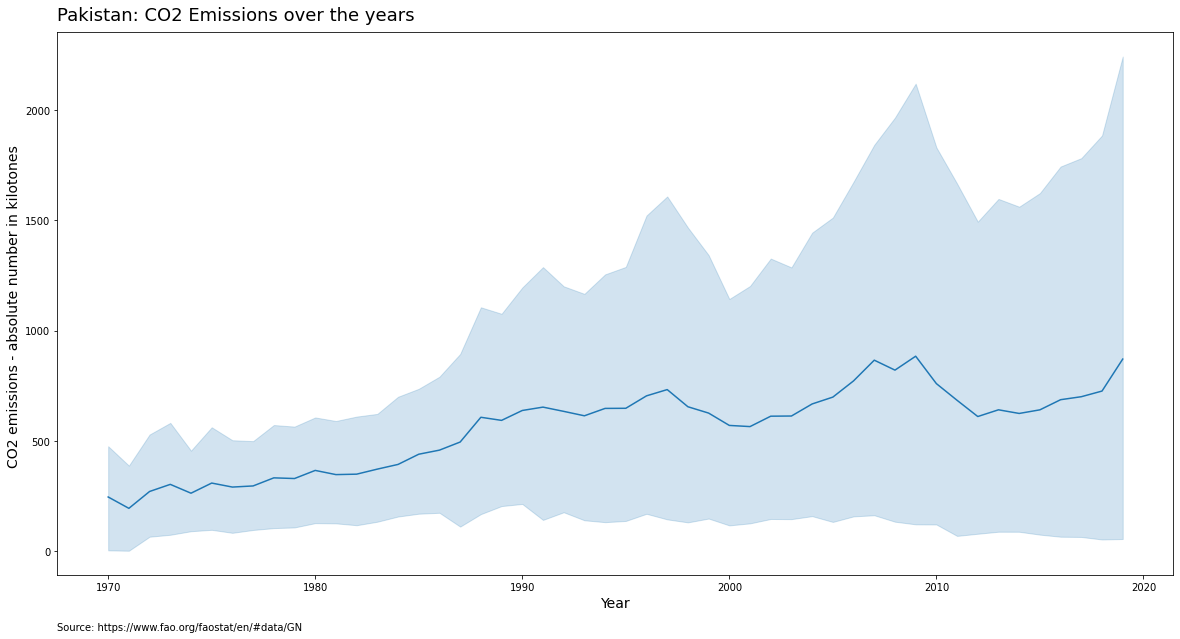

In [130]:
plt.figure(figsize = (20,10))
sns.lineplot(x = "Year", y = "Value", data = df_sub[df_sub["Area"]=="Pakistan"])

#customisation
plt.annotate('Source: https://www.fao.org/faostat/en/#data/GN', (0,-.1), xycoords ='axes fraction' )
plt.title("Pakistan: CO2 Emissions over the years", fontsize = 18, loc='left', y=1.01 )
plt.xlabel("Year", fontsize=14)
plt.ylabel("CO2 emissions - absolute number in kilotones ", fontsize=14)

plt.show()

> Groupby Pakistan and Item and plot the mean in horizontal bar chart


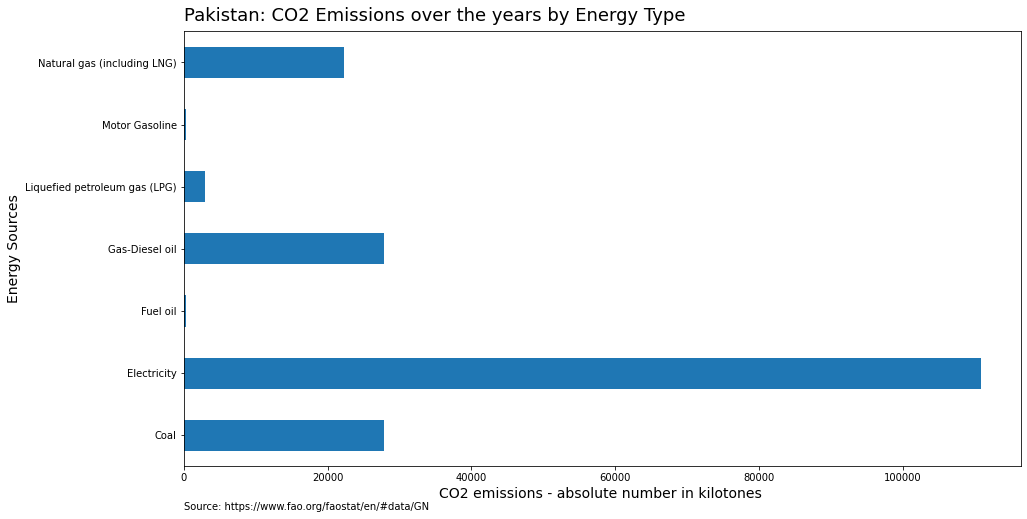

In [131]:
df_sub[df_sub["Area"]=="Pakistan"].groupby("Item")["Value"].sum().plot(kind="barh", figsize=(15,8))

#customisation
plt.annotate('Source: https://www.fao.org/faostat/en/#data/GN', (0,-.1), xycoords ='axes fraction' )
plt.title("Pakistan: CO2 Emissions over the years by Energy Type", fontsize = 18, loc='left', y=1.01 )
plt.ylabel("Energy Sources", fontsize=14)
plt.xlabel("CO2 emissions - absolute number in kilotones ", fontsize=14)
plt.show()

In [144]:
df_sub[df_sub["Area"]=="Pakistan"].groupby("Item")["Value"].sum()



Item
Coal                              27894.4824
Electricity                      110799.5409
Fuel oil                            361.2075
Gas-Diesel oil                    27892.1467
Liquefied petroleum gas (LPG)      2902.6501
Motor Gasoline                      289.3997
Natural gas (including LNG)       22298.8643
Name: Value, dtype: float64

#### Combine

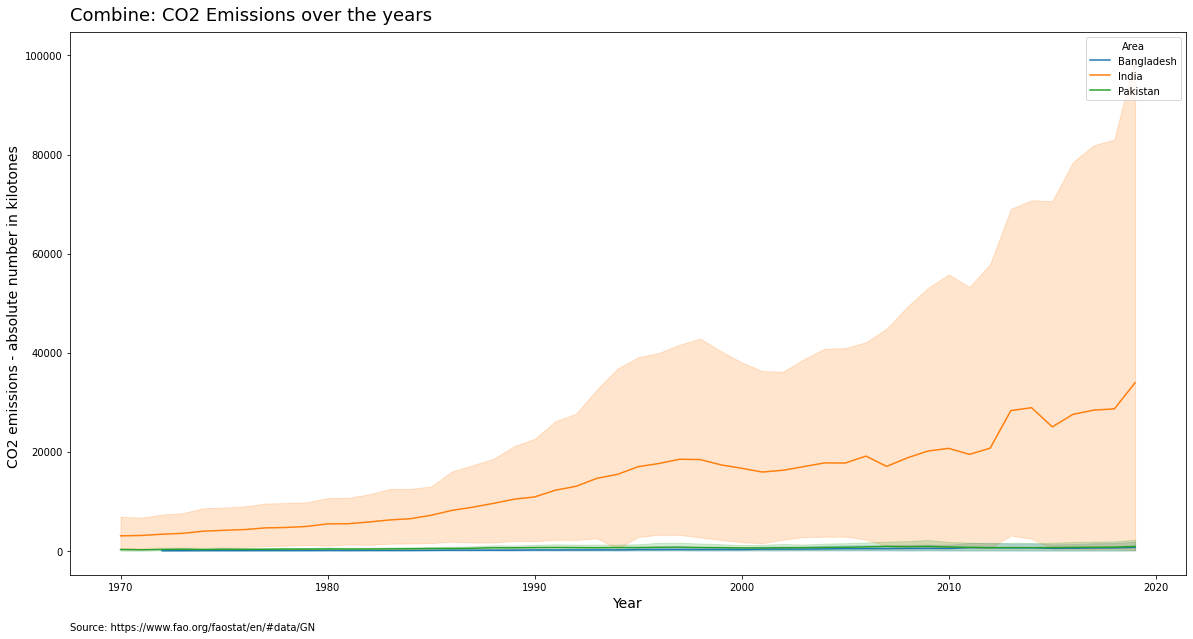

In [133]:
plt.figure(figsize = (20,10))

sns.lineplot(x = "Year", y = "Value", data = df_sub, hue = "Area")

#customisation
plt.annotate('Source: https://www.fao.org/faostat/en/#data/GN', (0,-.1), xycoords ='axes fraction' )
plt.title("Combine: CO2 Emissions over the years", fontsize = 18, loc='left', y=1.01 )
plt.xlabel("Year", fontsize=14)
plt.ylabel("CO2 emissions - absolute number in kilotones ", fontsize=14)

plt.show()

> Comparison of CO2 emissions between subcontinents countries


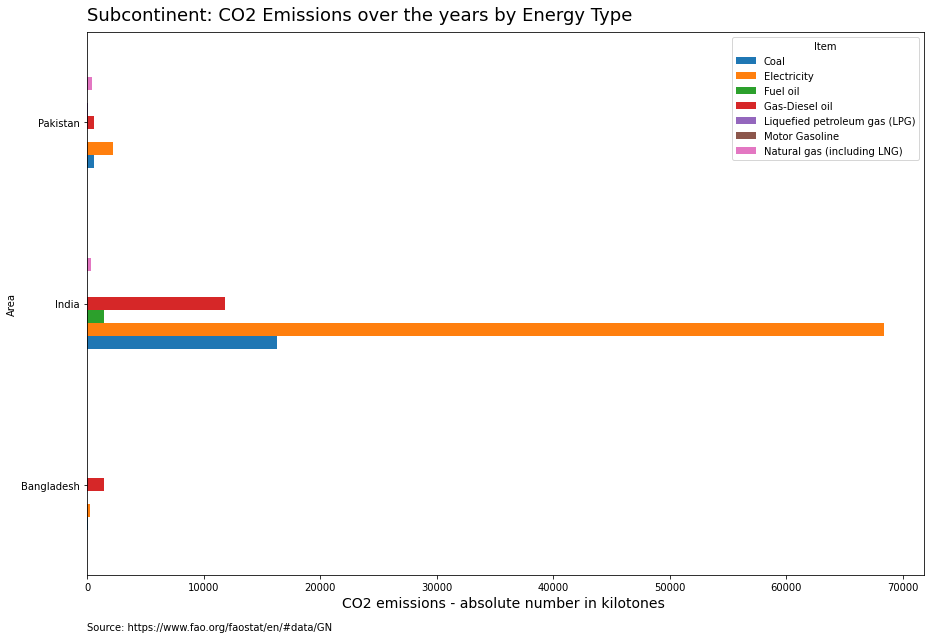

In [134]:
df_sub.groupby(['Area', 'Item'])['Value'].mean().unstack().plot(kind='barh', figsize=(15, 10))

#customisation
plt.annotate('Source: https://www.fao.org/faostat/en/#data/GN', (0,-.1), xycoords ='axes fraction' )
plt.title("Subcontinent: CO2 Emissions over the years by Energy Type", fontsize = 18, loc='left', y=1.01 )
#plt.ylabel("Year", fontsize=14)
plt.xlabel("CO2 emissions - absolute number in kilotones ", fontsize=14)
plt.show()